# ELECTRIC VEHICLE ANALYSIS

## INTRODUCTION

This project focuses on analyzing electric vehicle (EV) registration data through Exploratory Data Analysis (EDA) to derive meaningful insights. The dataset contains various attributes such as vehicle make, model year, electric range, and Clean Alternative Fuel Vehicle (CAFV) eligibility, providing a comprehensive view of the EV landscape across different locations.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading Dataset
df =pd.read_csv('C:/EV_Data.csv')
df.head(10)

VIN (1-10)     County       City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe   Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark   Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima     Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit   Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish    Everett    WA        98201        2019       FORD   
5  5YJ3E1EB5J  Snohomish    Bothell    WA        98021        2018      TESLA   
6  1N4AZ0CP4D  Snohomish    Everett    WA        98203        2013     NISSAN   
7  1N4AZ0CP0D  Snohomish   Mukilteo    WA        98275        2013     NISSAN   
8  1N4BZ0CP4G     Island    Clinton    WA        98236        2016     NISSAN   
9  KNDJP3AE2G     Skagit  Anacortes    WA        98221        2016        KIA   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
5     MODEL 3          Battery Electric Vehicle (BEV)   
6        LEAF          Battery Electric Vehicle (BEV)   
7        LEAF          Battery Electric Vehicle (BEV)   
8        LEAF          Battery Electric Vehicle (BEV)   
9        SOUL          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   
5           Clean Alternative Fuel Vehicle Eligible             215   
6           Clean Alternative Fuel Vehicle Eligible              75   
7           Clean Alternative Fuel Vehicle Eligible              75   
8           Clean Alternative Fuel Vehicle Eligible              84   
9           Clean Alternative Fuel Vehicle Eligible              93   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   
5          0                   1.0       475635324   
6          0                  38.0       253546023   
7          0                  21.0       176817364   
8          0                  10.0       475900379   
9      31950                  40.0       100489049   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500  
5   POINT (-122.18384 47.8031)  PUGET SOUND ENERGY INC        53061051916  
6  POINT (-122.23019 47.94949)  PUGET SOUND ENERGY INC        53061040900  
7  POINT (-122.29196 47.89908)  PUGET SOUND ENERGY INC        53061042001  
8   POINT (-122.35803 47.9796)  PUGET SOUND ENERGY INC        53029972100  
9  POINT (-122.61214 48.51748)  PUGET SOUND ENERGY INC        53057940301

## UNDERSTANDING DATA

In [3]:
df.shape

(112634, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

## DATA PREPROCESSING

In [7]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

## Handling Missing Values

In [8]:
# Drop null value
df.dropna(subset=['Model'], inplace=True)

In [9]:
# Giving a placeholder -1
df['Legislative District'].fillna(-1, inplace=True)

In [10]:
# Filling missing values as Unknown Location
df['Vehicle Location'].fillna('Unknown Location', inplace=True)

## UNIVARIATE ANALYSIS

In [11]:
# Counting EV Types
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            86024
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64

In [12]:
## Summary statistics
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112614.000000  112614.000000   112614.000000  112614.000000   
mean    98156.234278    2019.002655       87.828583    1793.758192   
std      2648.967665       2.892130      102.336611   10784.684549   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98120.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112614.000000    1.126140e+05       1.126140e+05  
mean              29.727192    1.994529e+08       5.296648e+10  
std               14.763241    9.399217e+07       1.699255e+09  
min               -1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484102e+08       5.303301e+10  
50%               34.000000    1.923844e+08       5.303303e+10  
75%               43.000000    2.191865e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

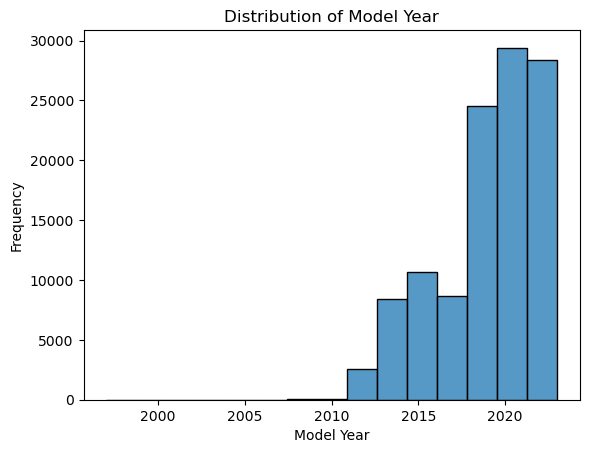

In [13]:
# Plotting the histogram for 'Model Year'
sns.histplot(x='Model Year', data=df, bins=15, kde=False)  
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

This histogram indicates that most of the vehicles in the dataset are newer models, especially from 2015 onward, with a peak around 2020-2021. The distribution shows that electric vehicles have become significantly more common in recent years, with very few older models dating back to the early 2000s or earlier.

In [28]:
#Assesing CAFV Eligible EV Models
cafv_counts=df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

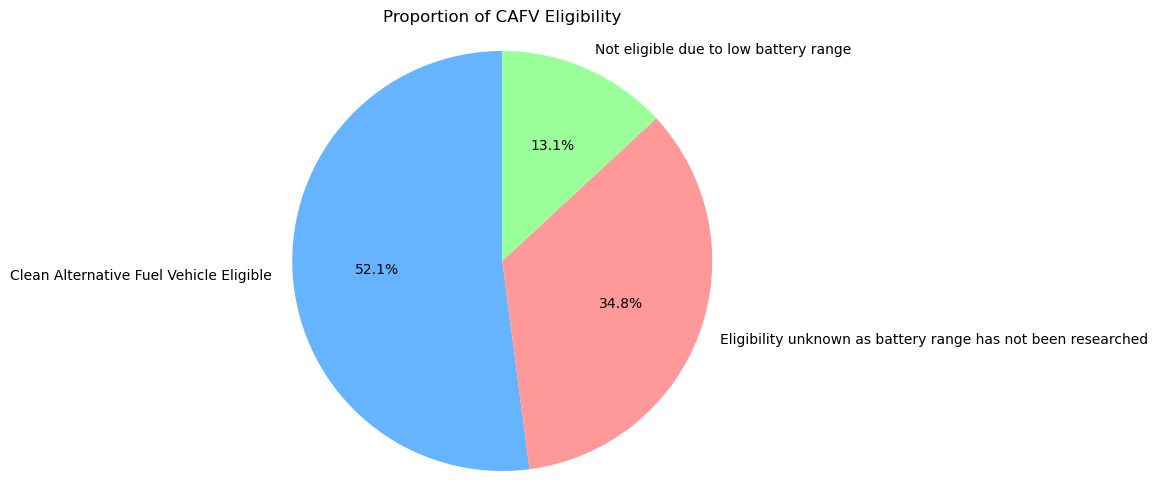

In [30]:
plt.figure(figsize=(8, 6))
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])

plt.title('Proportion of CAFV Eligibility')
plt.axis('equal')  
plt.show()

Total 52.1% of Models are CAFV Eligible, 13.1% is not eligible and for 34.8% of model eligibility is unknown.

In [31]:
#Descriptive statistics of "Electric Range"
df['Electric Range'].describe()

count    112614.000000
mean         87.828583
std         102.336611
min           0.000000
25%           0.000000
50%          32.000000
75%         208.000000
max         337.000000
Name: Electric Range, dtype: float64

In [16]:
#Finding the city that have more registrations of Model

country_vehicle_counts = df['City'].value_counts()

# Identify the country with the most vehicle registrations
most_registered_country = country_vehicle_counts.idxmax()
most_registered_count = country_vehicle_counts.max()
print(f"The city with the most registered vehicles is: {most_registered_country} with {most_registered_count} registrations.")


The city with the most registered vehicles is: Seattle with 20300 registrations.


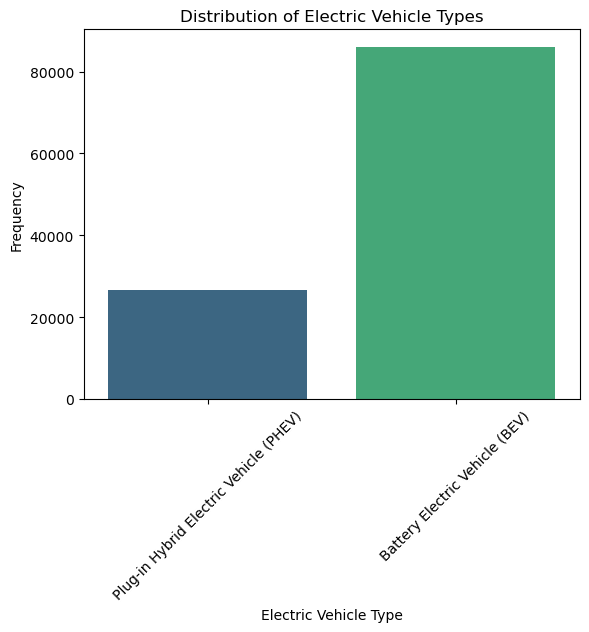

In [17]:
#Distribution of Vehicle Type
sns.countplot(x='Electric Vehicle Type', data=df, palette='viridis')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

Battery Electric Vehicle is more in number than Plug-in Hybrid Electric Vehicle

## BIVARIATE ANALYSIS

## Checking which Brand have more number of Model 

In [18]:
# Grouping by 'Make' and counting unique models for each make
model_counts_by_make = df.groupby('Make')['Model'].nunique().sort_values(ascending=False)
print(model_counts_by_make)

Make
BMW               11
AUDI              10
FORD               8
MERCEDES-BENZ      8
KIA                7
HYUNDAI            7
VOLVO              7
CHEVROLET          5
TESLA              5
TOYOTA             4
PORSCHE            4
RIVIAN             3
SMART              3
LINCOLN            2
MITSUBISHI         2
MINI               2
SUBARU             2
BENTLEY            2
CADILLAC           2
JEEP               2
HONDA              2
GENESIS            2
VOLKSWAGEN         2
LAND ROVER         2
TH!NK              1
FIAT               1
POLESTAR           1
NISSAN             1
FISKER             1
LUCID MOTORS       1
AZURE DYNAMICS     1
JAGUAR             1
CHRYSLER           1
LEXUS              1
Name: Model, dtype: int64


## Trends in Electric Range Over time

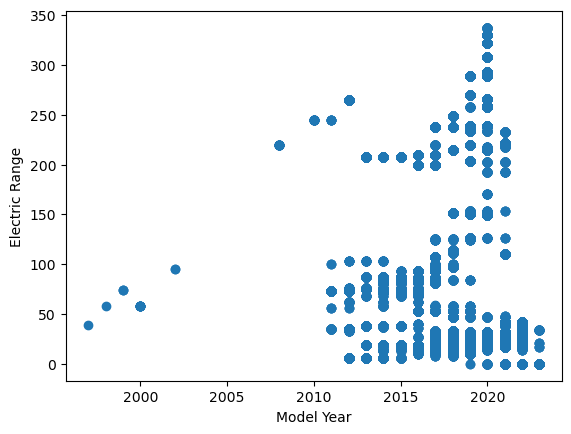

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['Model Year'], df['Electric Range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()


## Examining how electric range differs between BEVs and PHEVs

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

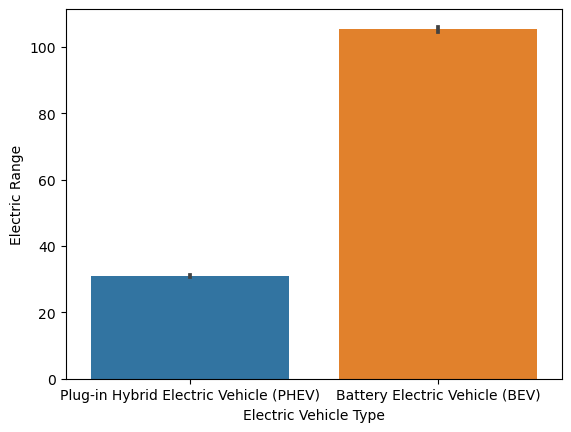

In [20]:
sns.barplot(x='Electric Vehicle Type', y='Electric Range', data=df)

Battery Electric Vehicle have more Electric Range than Plug-in Hybrid EV

## Top 10 Brand by Electric Range

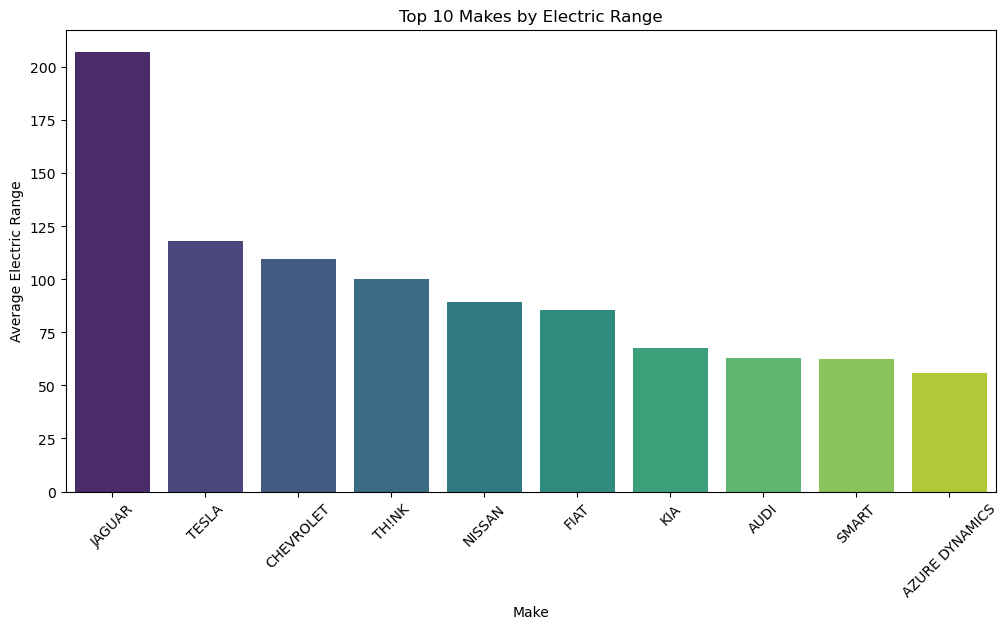

In [21]:
# Calculate the mean Electric Range for each Make
mean_electric_range = df.groupby('Make')['Electric Range'].mean().nlargest(10)

# Create the bar plot for the top 10 Makes
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_electric_range.index, y=mean_electric_range.values, palette='viridis')
plt.title('Top 10 Makes by Electric Range')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45) 
plt.show()

## CHOROPLETH MAP - NUMBER OF EV VEHICLES BY STATE

In [27]:

import plotly.express as px

# Count the number of EVs by State
ev_counts = df['State'].value_counts().reset_index()
ev_counts.columns = ['State', 'EV_Count']

# Create the Choropleth map
fig = px.choropleth(ev_counts,
                    locations='State',            
                    locationmode='USA-states',   
                    color='EV_Count',             
                    scope='usa',                  
                    title='Number of EV Vehicles by State',
                    color_continuous_scale='Viridis',
                    labels={'EV_Count': 'Number of EV Vehicles'})

fig.show()


## RACING BAR PLOT

In [24]:
import bar_chart_race as bcr
import warnings
from IPython.display import Imag

In [25]:
count_df = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Pivot the DataFrame to the required format
pivot_df = count_df.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

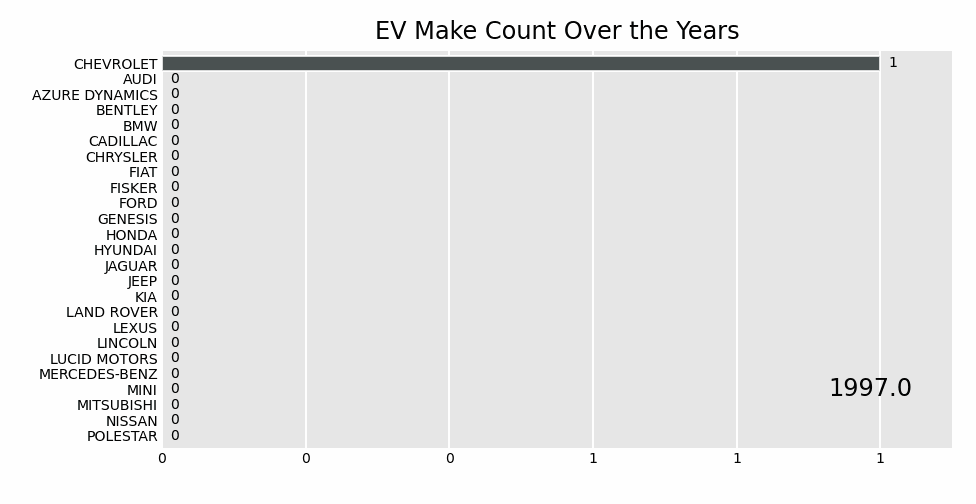

In [26]:
# Ignore UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Creating the racing bar plot and saving as a GIF
bcr.bar_chart_race(df=pivot_df,filename='EV_make_racing_bar_plot.gif',orientation='h',sort='desc',n_bars=25,
                   title='EV Make Count Over the Years',filter_column_colors=True,period_length=1000,writer='pillow')

Image(filename='EV_make_racing_bar_plot.gif')